In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [8]:
def get_gru_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size = shape, device = device) * 0.01

    def three():
        return (normal((num_inputs, num_hiddens)),
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device = device))

    W_xz, W_hz, b_z = three()
    W_xr, W_hr, b_r = three()
    W_xh, W_hh, b_h = three()

    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device = device)

    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]

    for param in params:
        param.requires_grad_(True)

    return params

In [9]:
def init_gru_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device = device), )

In [10]:
def gru(inputs, state, params):

    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []

    for X in inputs:
        Z = torch.sigmoid(torch.mm(X, W_xz) + torch.mm(H, W_hz) + b_z)
        R = torch.sigmoid(torch.mm(X, W_xr) + torch.mm(H, W_hr) + b_r)
        H_tilda = torch.tanh(torch.mm(X, W_xh) + torch.mm((R * H), W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = torch.mm(H, W_hq) + b_q
        outputs.append(Y)

    return torch.cat(outputs, dim = 0), (H, )

In [11]:
from matplotlib_inline.backend_inline import set_matplotlib_formats

def use_svg_display():
    set_matplotlib_formats('svg')

d2l.use_svg_display = use_svg_display

perplexity 10.3, 25607.5 tokens/sec on cuda:0
time travellere the the the the the the the the the the the the 
travellere the the the the the the the the the the the the 


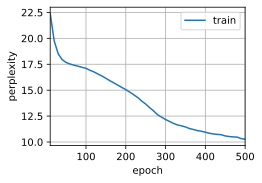

In [12]:
vocab_size, num_hiddens, device = len(vocab), 256, d2l.try_gpu()
num_epochs, lr = 500, 0.1

model = d2l.RNNModelScratch(len(vocab), num_hiddens, device, get_gru_params,
                            init_gru_state, gru)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

perplexity 8.7, 285355.0 tokens/sec on cuda:0
time travellere the the the the the the the the the the the the 
travellere the the the the the the the the the the the the 


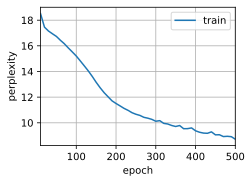

In [13]:
num_inputs = vocab_size
gru_layer = nn.GRU(num_inputs, num_hiddens)
model = d2l.RNNModel(gru_layer, len(vocab))
model = model.to(device)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)